<a href="https://colab.research.google.com/github/abhishek11800/Virtusa-FSD/blob/my-collab/Bank_customer_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Model**

# **Objective**
The objective of the project is to develop a model that predicts customer churn in a bank. Customer churn refers to the phenomenon where customers stop doing business with a company or discontinue their subscription or membership.

# **Data Source**
The data for this project can be obtained from the following source:
Data Source: [link text](https://github.com/PRIYANG-BHATT/Datasets/raw/main/DS/Churn_Modelling.csv)

# **Import Data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# **Import Data**

In [2]:
data = pd.read_csv('https://github.com/PRIYANG-BHATT/Datasets/raw/main/DS/Churn_Modelling.csv')


# **Describe Data**

In [4]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Data Visualization**

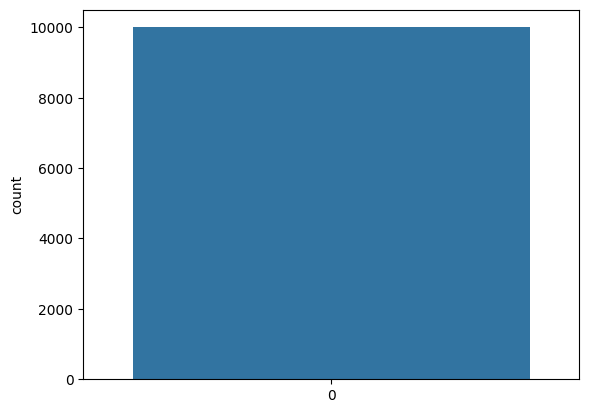

In [6]:
sns.countplot(data['Exited'])
plt.show()

# **Data Preprocessing**

In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# **Define Target Variable (y) and Feature Variables (X)**

In [7]:
y = data['Exited']
X = data.drop('Exited', axis=1)

# **Train Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modeling**

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# **Model Evaluation**

In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.7875
Confusion Matrix:
[[1374  233]
 [ 192  201]]


# **Prediction**

In [16]:
new_data = pd.DataFrame({
    'CreditScore': [650],
    'Geography': ['France'],
    'Gender': ['Female'],
    'Age': [40],
    'Tenure': [5],
    'Balance': [50000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [80000]
})

new_data['Geography'] = new_data['Geography'].map({'Germany': 1, 'France': 0, 'Spain': 2})

new_data_encoded = pd.get_dummies(new_data, columns=['Gender'], drop_first=True)
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

prediction = model.predict(new_data_encoded)
print('Prediction:', prediction)

Prediction: [0]


# **Explaination**


1. **Import Library:** This step imports the necessary libraries that will be used throughout the project, such as pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for data visualization, and scikit-learn for machine learning tasks.

2. **Import Data:** This step reads the dataset from the provided URL using pandas' read_csv() function and stores it in the variable data.

3. **Describe Data:** This step provides an overview of the dataset. data.head() displays the first few rows of the dataset, data.info() provides information about the columns and data types, and data.describe() gives a statistical summary of the dataset, including count, mean, standard deviation, minimum, and maximum values.

4. **Data Visualization:** This step involves visualizing the data to gain insights and understand its distribution. The example provided plots a histogram of the 'Age' column using matplotlib, which helps visualize the age distribution of the customers.

5. **Data Preprocessing:** This step involves handling missing values and categorical variables. The example shows two common preprocessing tasks. First, dropna() is used to remove rows with missing values. Second, pd.get_dummies() is used to convert categorical variables ('Gender' and 'Geography') into binary dummy variables, dropping the first category to avoid multicollinearity.

6. **Define Target Variable (y) and Feature Variables (X):** This step separates the dataset into the target variable (dependent variable) and feature variables (independent variables). The example assigns all columns except 'Exited' to X, and 'Exited' column to y.

7. **Train Test Split:** This step splits the data into training and testing datasets. The example uses train_test_split() function from scikit-learn to randomly split the data into training and testing sets, with a test size of 20% of the total dataset.

8. **Modeling:** This step involves building a machine learning model on the training data. The example uses logistic regression from scikit-learn as the modeling technique. It also includes data scaling using StandardScaler() to standardize the numerical features before training the model.

9. **Model Evaluation:** This step evaluates the trained model using evaluation metrics. The example shows how to calculate the confusion matrix and accuracy score for the predicted values (y_pred) compared to the actual values (y_test).

10. Prediction: This step demonstrates how to use the trained model to make predictions on new data. The example creates a new DataFrame (new_data) with some example input values and scales it using the same StandardScaler() object. Then, it uses the trained model to predict the churn outcome for the new data.